In [13]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from utils.binstat import plot_xstat
from utils.fs_cut import get_str_max

data = pd.read_csv("data/dataset_rnne_dune_numu.csv.xz")
d = {
    "vector": [
        "particle.is_shower",
        "particle.length",
        "particle.start.x",
        "particle.start.y",
        "particle.start.z",
        "particle.dir.x",
        "particle.dir.y",
        "particle.dir.z",
        "particle.energy",
        "particle.calE",
        "particle.charge",
        "particle.nHit",
    ],
    "scalar": ["event.calE", "event.charge", "event.nHits"],
    "target": ["mc.nuE", "mc.lepE"],
}


In [14]:
def string_to_float_list(string):
    """
    By default, convert all strings to list of floats.
    Otherwise, return empty list.
    """
    if not string or not isinstance(string, str):
        return []
    return [float(s) for s in string.split(",")]

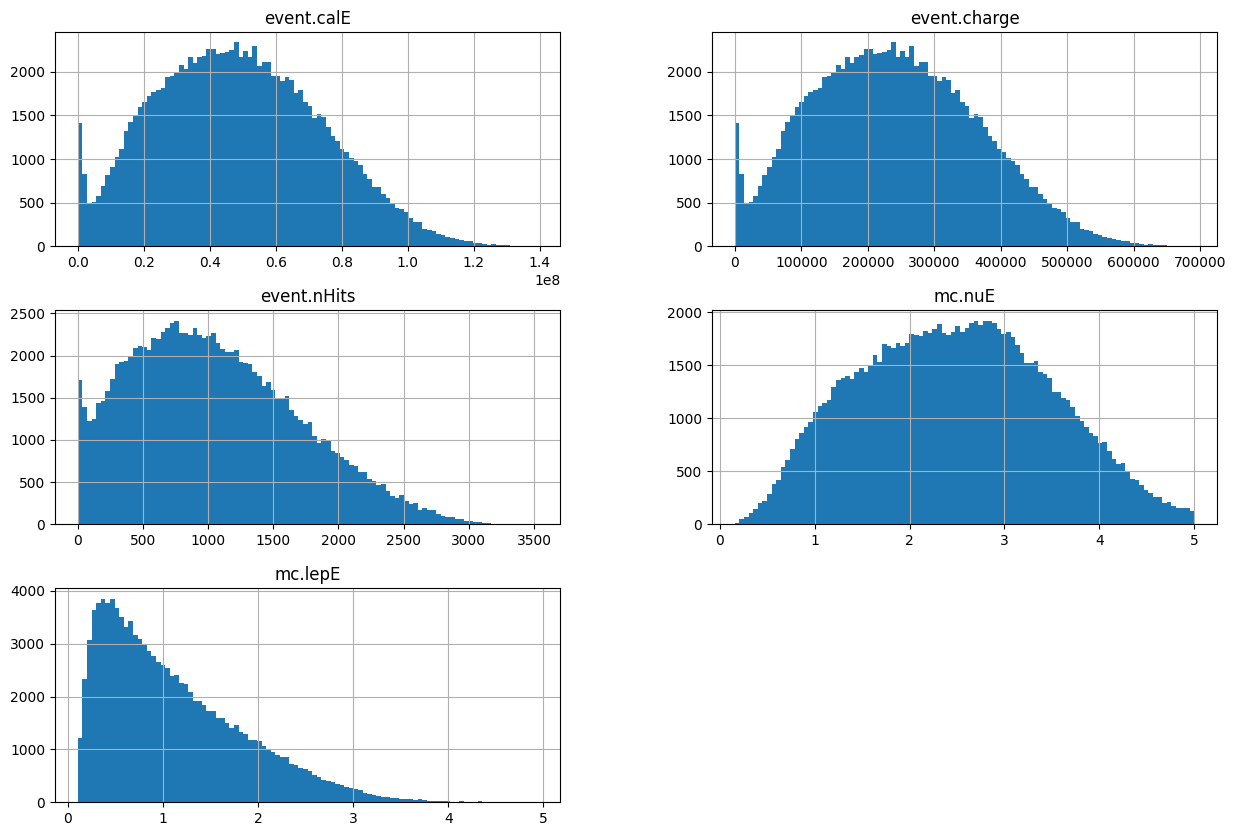

In [20]:
data.hist(column=d["scalar"]+d["target"], bins=100, figsize=(15, 10))
plt.show()

In [16]:
d["vector"]+d["scalar"]+d["target"]

['particle.is_shower',
 'particle.length',
 'particle.start.x',
 'particle.start.y',
 'particle.start.z',
 'particle.dir.x',
 'particle.dir.y',
 'particle.dir.z',
 'particle.energy',
 'particle.calE',
 'particle.charge',
 'particle.nHit',
 'event.calE',
 'event.charge',
 'event.nHits',
 'mc.nuE',
 'mc.lepE']